In [ ]:
import utility

utility.lj_potential(0.5,10)

In [ ]:
utility.pbc(43,10)

In [ ]:
import init
#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

In [ ]:
positions = init.init_system(box_length, Npart)


In [ ]:
positions
import random
import numpy as np


In [ ]:
idx = random.randint(0,Npart-1)
idx

In [ ]:
prev_position = np.copy(positions[idx])
prev_position

In [ ]:
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo1

In [ ]:
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
Wo = Wo1 * Wo2
print(Wo)

In [ ]:
positions[idx][0] = np.random.rand(3)* box_length
positions[idx][0]

In [ ]:
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wn1

In [ ]:
#select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))

    Wn2_sum = sum(Wn2)

    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
    
    return 


In [ ]:
import init
import utility
import visualize
import random
import numpy as np

#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

positions = init.init_system(box_length, Npart)

def check(positions):
    for pos in positions:
        if np.linalg.norm(pos[0] - pos[1]) > bond_length + 0.01:
            return False
    
    return True

def get_minimum_distance(positions, idx1, idx2):
    min_len = 1000
    for i in range(len(positions)):
        if idx1 !=i:
            for pos in positions[i]:
                min_len = min(min_len, utility.pbc(np.linalg.norm(pos - positions[idx1][idx2]),box_length))
    
    return min_len

def CBMC_step(positions, Npart):
    #select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    # print("Wo2" ,Wo2)
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
        # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
            # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

    Wn2_sum = sum(Wn2)
    # print(Wn2_sum)
    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    # print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    # print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
            print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
            if get_minimum_distance(positions,idx,1) < 1:
                print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
                # print(Wn2)
                
                # return True
    
    return False

total_energy_sum = 0

for i in range(100):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    # print(energy)
    total_energy_sum += energy
    if CBMC_step(positions,Npart) == True:
        break


print(f"avg_energy {total_energy_sum / 100}")
print(f"Acceptance percentage {accepted_steps/1}")
visualize.visualize(positions)


In [ ]:
a = [5,3,2,1,4]
b = sum(a)
b
a[1]

In [ ]:

global accepted_steps
idx = random.randint(0,Npart-1)
#find rosenbluth factor for previous configuration
prev_position = np.copy(positions[idx])
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
# print("Wo2" ,Wo2)
Wo = Wo1 * Wo2
#find rosenbluth factor for new configuration
#choose a random postion for first atom
positions[idx][0] = np.random.rand(3)* box_length
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
second_atom_pos = []
Wn2 = []
for i in range(k):
    r = utility.generate_random_unit_vector()* bond_length
    positions[idx][1] = positions[idx][0] + r
    second_atom_pos.append(positions[idx][1])
    Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
    # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
        # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

Wn2_sum = sum(Wn2)
# print(Wn2_sum)
#select a configuration i with probaility Wn2[i]/Wn2_sum
cum_Wn2 = Wn2[0]
r_Wn2_sum = random.random()*Wn2_sum
i = 0
while cum_Wn2 < r_Wn2_sum:
    i +=1
    cum_Wn2 += Wn2[i]
# print(i, Wn2[i])
Wn = Wn1 * Wn2_sum
#replace position of second atom with selected second atom configuration 
positions[idx][1] = second_atom_pos[i]
# print(Wo, " ", Wn)
if Wn < Wo and random.random() > Wn/Wo:
    #not accept
    positions[idx] = prev_position   
else :
    accepted_steps += 1
    if debug:
        print("new move accepted")
        print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
        if get_minimum_distance(positions,idx,1) < 1:
            print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
            # print(Wn2)
            
            # return True

In [ ]:
a= np.array((3,1))
c = []
for i in range(10):
    a +=1
    c.append(a)
print(c)

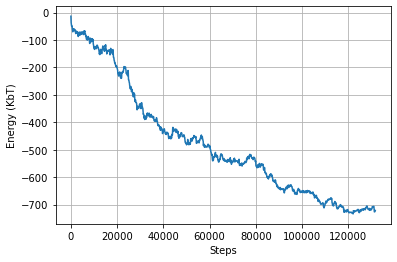

In [1]:
import visualize

visualize.plot_energy_from_file("energy.txt")

In [ ]:
import matplotlib.pyplot as plt
with open("energy.txt",'r') as f:
    energy = [float(line.strip()) for line in f]
    steps = [ int(100 * i) for i in range(len(energy))]
    plt.plot(steps, energy)
    plt.ylabel("Energy (KbT)")
    plt.xlabel("Number of steps")
    plt.grid()
    plt.show()

In [ ]:
np_positions = np.load('positions.npy', allow_pickle=True)


In [ ]:
positions = []
for mol_pos in np_positions:
    positions.append([mol_pos[0],mol_pos[1]])

In [ ]:
utility.total_energy(positions,box_length)

In [1]:
import init
from config import *
import utility
positions = init.init_system(box_length,Npart)

In [2]:
len(positions)

108

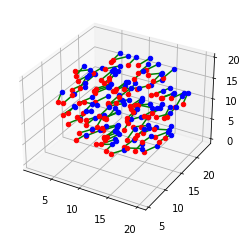

-47.758367334335034

In [3]:
import visualize, utility
visualize.visualize(positions)
utility.total_energy(positions,box_length)

In [4]:
from ethane_cbmc import *
# from tempfile import TemporaryFile
# position_file = TemporaryFile()

# positions = init.init_system(box_length, Npart)
# positions = utility.read_positions_from_file("positions.npy")

# energy_file = open("energy.txt",'a' )

for i in range(nsteps):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    print(f"Energy of the system at step {i} is: {energy}")
    # if i%write_interval == 0:
        # energy_file.write(str(energy)+"\n")
    positions = CBMC_step(positions,Npart)

# np.save('positions.npy', np.array(positions, dtype=object), allow_pickle=True)


Energy of the system at step 0 is: -65.30504692641719
Old Rosenbluth factor 4021.5464018255266 New Rosenbluth factor 9.306097734724384e-29, Move not accpeted !! 
Energy of the system at step 1 is: -65.30504692641719
Old Rosenbluth factor 2671.2205565736995 New Rosenbluth factor 273.8386975883296, Move not accpeted !! 
Energy of the system at step 2 is: -65.30504692641719
Old Rosenbluth factor 1487.722543428808 New Rosenbluth factor 0.0, Move not accpeted !! 
Energy of the system at step 3 is: -65.30504692641719
Old Rosenbluth factor 2854.2776780075624 New Rosenbluth factor 10000.432402175322, Move accpeted !! 
Energy of the system at step 4 is: -67.80666129566895
Old Rosenbluth factor 786231.6089753298 New Rosenbluth factor 0.0, Move not accpeted !! 
Energy of the system at step 5 is: -67.80666129566895
Old Rosenbluth factor 14635.145350897265 New Rosenbluth factor 0.0, Move not accpeted !! 
Energy of the system at step 6 is: -67.80666129566895
Old Rosenbluth factor 1147434.4366605687 

In [13]:
positions_list = [init.init_system(box_length,Npart),init.init_system(box_length,Npart)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def animate(i):
    # fig = plt.figure()
    ax.cla()
    positions = positions_list[i]
    for pos in positions:
        ax.plot([pos[0][0],pos[1][0]],[pos[0][1],pos[1][1]],
        [pos[0][2],pos[1][2]], 'g')
        ax.scatter3D([pos[0][0]],[pos[0][1]], [pos[0][2]], color = 'red')
        ax.scatter3D([pos[1][0]],[pos[1][1]], [pos[1][2]], color = 'blue')
    

num_plots = (len(positions_list))
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ani = FuncAnimation(fig, animate, frames=num_plots, interval=200)

writer = PillowWriter(fps=1)
ani.save('plots.gif', writer=writer)


In [14]:
import init
import visualize
import utility
import numpy as np
with open('nvt.gro','r') as f:
    lines = [line for line in f]
    positions = []
    for i in range(Npart):
        l1 = lines[2*i+2].split()
        l2 = lines[2*i+3].split()
        mol_pos_1 = np.array([l1[3],l1[4],l1[5]]).astype(float)
        mol_pos_2 = np.array([l2[3],l2[4],l2[5]]).astype(float)
        positions.append([mol_pos_1,mol_pos_2])

positions

[[array([1.838, 0.353, 0.604]), array([1.827, 0.438, 0.481])],
 [array([1.578, 0.156, 0.2  ]), array([1.51 , 0.254, 0.291])],
 [array([1.461, 1.652, 1.732]), array([1.316, 1.666, 1.795])],
 [array([2.132, 0.538, 1.558]), array([2.074, 0.401, 1.549])],
 [array([0.655, 1.205, 0.166]), array([0.586, 1.328, 0.211])],
 [array([1.937, 2.116, 0.061]), array([1.861, 2.035, 0.165])],
 [array([0.085, 0.992, 1.625]), array([2.199, 0.882, 1.564])],
 [array([1.166, 0.398, 2.184]), array([1.237, 0.473, 2.072])],
 [array([0.976, 1.868, 0.18 ]), array([1.09 , 1.781, 0.113])],
 [array([0.976, 0.715, 0.248]), array([0.999, 0.802, 0.371])],
 [array([0.726, 0.185, 0.976]), array([0.618, 0.221, 1.076])],
 [array([0.165, 2.154, 2.08 ]), array([0.169, 0.064, 2.181])],
 [array([0.307, 0.282, 1.827]), array([0.41 , 0.372, 1.764])],
 [array([0.607, 2.078, 1.169]), array([0.485, 2.1  , 1.09 ])],
 [array([1.12 , 2.094, 1.562]), array([0.984, 2.076, 1.502])],
 [array([2.109, 2.152, 0.424]), array([2.04 , 0.086, 0.

In [15]:
lines

['#Martini system in water t= 10000.00000 step= 5000000\n',
 ' # 216\n',
 '    1Q7GY    C1    1   1.838   0.353   0.604  0.0337  0.1631  0.0255\n',
 '    1Q7GY    C2    2   1.827   0.438   0.481 -0.1548 -0.1424  0.2589\n',
 '    2Q7GY    C1    3   1.578   0.156   0.200 -0.0886 -1.0574  0.0056\n',
 '    2Q7GY    C2    4   1.510   0.254   0.291 -0.2172 -0.0233  0.8058\n',
 '    3Q7GY    C1    5   1.461   1.652   1.732  0.0994  0.6112  0.5396\n',
 '    3Q7GY    C2    6   1.316   1.666   1.795 -0.5768 -0.0265  0.1323\n',
 '    4Q7GY    C1    7   2.132   0.538   1.558  0.0800  0.1758 -1.0133\n',
 '    4Q7GY    C2    8   2.074   0.401   1.549  0.6113  0.1812 -0.0100\n',
 '    5Q7GY    C1    9   0.655   1.205   0.166  0.3730 -0.1190 -0.0998\n',
 '    5Q7GY    C2   10   0.586   1.328   0.211  0.2152  0.5630 -0.0883\n',
 '    6Q7GY    C1   11   1.937   2.116   0.061  0.1194  0.5107 -0.0332\n',
 '    6Q7GY    C2   12   1.861   2.035   0.165  0.0859 -0.1737 -0.1836\n',
 '    7Q7GY    C1   13   0.

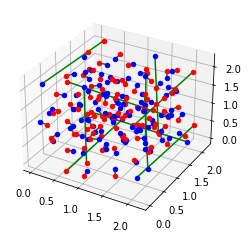

In [16]:
from config import *
visualize.visualize(positions)

In [18]:
utility.total_energy(positions,2.2)

2.7180046338099917e+56